In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils

Using TensorFlow backend.


In [3]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()
print("Number of training points is {0}".format(x_train.shape[0]))
print("Number of testing points is {0}".format(x_test.shape[0]))

11493376/11490434 [==============================] - 0s 0us/step
Number of training points is 60000
Number of testing points is 10000


Class label for 0th datapoint is 5


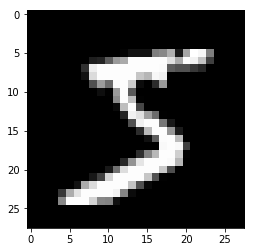

In [4]:
%matplotlib inline
print("Class label for 0th datapoint is {0}".format(y_train[0]))
plt.imshow(x_train[0],cmap='gray')
plt.show()

In [0]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [0]:
batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
from keras import backend as K
img_rows, img_cols = 28, 28

# the data, split between train and test sets
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [0]:
#Normalizing data
x_train=x_train/255
x_test=x_test/255

In [0]:
#Building a 3 Convolution layer Convnet Model
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout
from keras import backend as K
from keras.initializers import he_normal
model=Sequential()
model.add(Conv2D(64, kernel_size=(3, 3),
                 activation='relu',padding='same',
                 kernel_initializer=he_normal(seed=None),input_shape=input_shape))
model.add(Conv2D(32, kernel_size=(3, 3),padding='same',activation='relu'))
model.add(Conv2D(16, kernel_size=(3, 3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_47 (Conv2D)           (None, 28, 28, 64)        640       
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 28, 28, 32)        18464     
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 28, 28, 16)        4624      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 14, 14, 16)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)               401536    
__________

In [0]:
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [0]:
from keras.optimizers import Adagrad
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
history=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 327s 5ms/step - loss: 0.1785 - acc: 0.9444 - val_loss: 0.0469 - val_acc: 0.9854
Epoch 2/12
60000/60000 [==============================] - 326s 5ms/step - loss: 0.0647 - acc: 0.9797 - val_loss: 0.0322 - val_acc: 0.9889
Epoch 3/12
60000/60000 [==============================] - 326s 5ms/step - loss: 0.0481 - acc: 0.9845 - val_loss: 0.0274 - val_acc: 0.9903
Epoch 4/12
60000/60000 [==============================] - 325s 5ms/step - loss: 0.0389 - acc: 0.9879 - val_loss: 0.0264 - val_acc: 0.9910
Epoch 5/12
60000/60000 [==============================] - 326s 5ms/step - loss: 0.0327 - acc: 0.9893 - val_loss: 0.0237 - val_acc: 0.9923
Epoch 6/12
60000/60000 [==============================] - 325s 5ms/step - loss: 0.0274 - acc: 0.9910 - val_loss: 0.0233 - val_acc: 0.9923
Epoch 7/12
60000/60000 [==============================] - 327s 5ms/step - loss: 0.0238 - acc: 0.9919 - val_loss: 0.0237 - 

Test score: 0.022885850649204075
Test accuracy: 0.9932


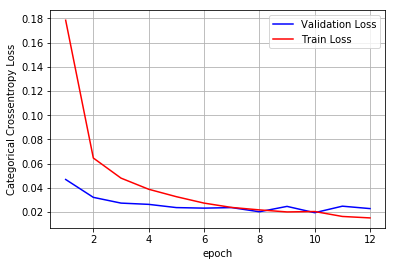

In [0]:
score = model.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

#Training loss
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [0]:
#Building a 5 Convolution layer Convnet Model
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout
from keras import backend as K
from keras.initializers import he_normal

model_5=Sequential()
model_5.add(Conv2D(16, kernel_size=(5, 5),
                 activation='relu',
                 kernel_initializer=he_normal(seed=None),padding='same',input_shape=input_shape))
model_5.add(Conv2D(24, kernel_size=(5, 5),activation='relu'))
model_5.add(Conv2D(30, kernel_size=(5, 5),activation='relu'))
model_5.add(MaxPooling2D(pool_size=(2, 2)))

model_5.add(Conv2D(32, kernel_size=(5, 5),activation='relu'))
model_5.add(Conv2D(54, kernel_size=(5, 5),activation='relu'))
model_5.add(MaxPooling2D(pool_size=(2, 2)))

model_5.add(Dropout(0.5))
model_5.add(Flatten())
model_5.add(Dense(128, activation='relu'))
model_5.add(Dense(num_classes, activation='softmax'))

model_5.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_75 (Conv2D)           (None, 28, 28, 16)        416       
_________________________________________________________________
conv2d_76 (Conv2D)           (None, 24, 24, 24)        9624      
_________________________________________________________________
conv2d_77 (Conv2D)           (None, 20, 20, 30)        18030     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 10, 10, 30)        0         
_________________________________________________________________
conv2d_78 (Conv2D)           (None, 6, 6, 32)          24032     
_________________________________________________________________
conv2d_79 (Conv2D)           (None, 2, 2, 54)          43254     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 1, 1, 54)          0         
__________

In [0]:
from keras.optimizers import Adagrad
model_5.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
history_5=model_5.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 262s 4ms/step - loss: 0.3572 - acc: 0.8849 - val_loss: 0.0552 - val_acc: 0.9848
Epoch 2/12
60000/60000 [==============================] - 261s 4ms/step - loss: 0.1129 - acc: 0.9679 - val_loss: 0.0360 - val_acc: 0.9896
Epoch 3/12
60000/60000 [==============================] - 261s 4ms/step - loss: 0.0861 - acc: 0.9756 - val_loss: 0.0264 - val_acc: 0.9910
Epoch 4/12
60000/60000 [==============================] - 262s 4ms/step - loss: 0.0701 - acc: 0.9806 - val_loss: 0.0331 - val_acc: 0.9899
Epoch 5/12
60000/60000 [==============================] - 260s 4ms/step - loss: 0.0579 - acc: 0.9836 - val_loss: 0.0297 - val_acc: 0.9914
Epoch 6/12
60000/60000 [==============================] - 260s 4ms/step - loss: 0.0536 - acc: 0.9847 - val_loss: 0.0304 - val_acc: 0.9916
Epoch 7/12
60000/60000 [==============================] - 260s 4ms/step - loss: 0.0456 - acc: 0.9875 - val_loss: 0.0264 - 

Test score: 0.02466107032220057
Test accuracy: 0.9934


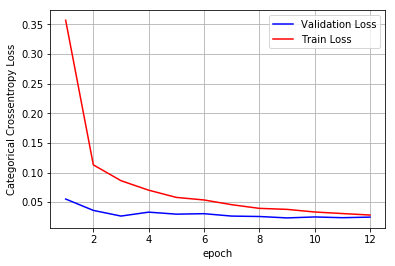

In [0]:
score = model_5.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

#Training loss
vy = history_5.history['val_loss']
ty = history_5.history['loss']
plt_dynamic(x, vy, ty, ax)

In [0]:
#Building a 7 Convolution layer Convnet Model
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout
from keras.layers import Convolution2D
from keras import backend as K
from keras.initializers import he_normal

model_7=Sequential()
model_7.add(Convolution2D(16, kernel_size=(2, 2),
                 activation='relu',
                 kernel_initializer=he_normal(seed=None),padding='same',input_shape=input_shape))
model_7.add(Convolution2D(22, kernel_size=(2, 2),activation='relu'))
model_7.add(Convolution2D(28, kernel_size=(2, 2),activation='relu'))
model_7.add(MaxPooling2D(pool_size=(2, 2)))

model_7.add(Convolution2D(32, kernel_size=(2, 2),padding='same',activation='relu'))
model_7.add(Convolution2D(40, kernel_size=(2, 2),activation='relu'))
model_7.add(Convolution2D(50, kernel_size=(2, 2),activation='relu'))
model_7.add(Convolution2D(64, kernel_size=(2, 2),activation='relu'))
model_7.add(MaxPooling2D(pool_size=(2, 2)))

model_7.add(Dropout(0.5))
model_7.add(Flatten())
model_7.add(Dense(128, activation='relu'))
model_7.add(Dense(num_classes, activation='softmax'))

model_7.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_114 (Conv2D)          (None, 28, 28, 16)        80        
_________________________________________________________________
conv2d_115 (Conv2D)          (None, 27, 27, 22)        1430      
_________________________________________________________________
conv2d_116 (Conv2D)          (None, 26, 26, 28)        2492      
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 13, 13, 28)        0         
_________________________________________________________________
conv2d_117 (Conv2D)          (None, 13, 13, 32)        3616      
_________________________________________________________________
conv2d_118 (Conv2D)          (None, 12, 12, 40)        5160      
_________________________________________________________________
conv2d_119 (Conv2D)          (None, 11, 11, 50)        8050      
__________

In [0]:
from keras.optimizers import Adagrad
model_7.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
history_7=model_7.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 159s 3ms/step - loss: 0.2129 - acc: 0.9320 - val_loss: 0.0458 - val_acc: 0.9848
Epoch 2/12
60000/60000 [==============================] - 157s 3ms/step - loss: 0.0629 - acc: 0.9810 - val_loss: 0.0625 - val_acc: 0.9795
Epoch 3/12
60000/60000 [==============================] - 159s 3ms/step - loss: 0.0472 - acc: 0.9854 - val_loss: 0.0247 - val_acc: 0.9923
Epoch 4/12
60000/60000 [==============================] - 158s 3ms/step - loss: 0.0389 - acc: 0.9877 - val_loss: 0.0232 - val_acc: 0.9916
Epoch 5/12
60000/60000 [==============================] - 157s 3ms/step - loss: 0.0335 - acc: 0.9893 - val_loss: 0.0241 - val_acc: 0.9930
Epoch 6/12
60000/60000 [==============================] - 156s 3ms/step - loss: 0.0287 - acc: 0.9906 - val_loss: 0.0191 - val_acc: 0.9932
Epoch 7/12
60000/60000 [==============================] - 159s 3ms/step - loss: 0.0267 - acc: 0.9916 - val_loss: 0.0207 - 

Test score: 0.020760127860461036
Test accuracy: 0.9939


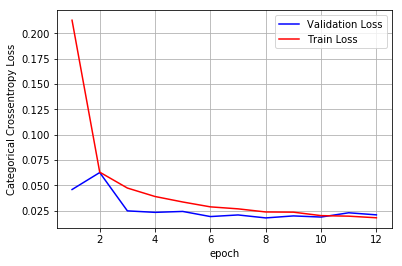

In [0]:
score = model_7.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

#Training loss
vy = history_7.history['val_loss']
ty = history_7.history['loss']
plt_dynamic(x, vy, ty, ax)

In [12]:
#Building a 3 Convolution layer Convnet Model with dropout rate=0.2
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout
from keras import backend as K
from keras.initializers import he_normal
model_dr=Sequential()
model_dr.add(Conv2D(64, kernel_size=(3, 3),
                 activation='relu',padding='same',
                 kernel_initializer=he_normal(seed=None),input_shape=input_shape))
model_dr.add(Conv2D(32, kernel_size=(3, 3),padding='same',activation='relu'))
model_dr.add(Conv2D(16, kernel_size=(3, 3),activation='relu',padding='same'))
model_dr.add(MaxPooling2D(pool_size=(2, 2)))

model_dr.add(Dropout(0.2))
model_dr.add(Flatten())
model_dr.add(Dense(128, activation='relu'))
model_dr.add(Dense(num_classes, activation='softmax'))

model_dr.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 64)        640       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 32)        18464     
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 28, 28, 16)        4624      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 14, 14, 16)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               401536    
__________

In [13]:
from keras.optimizers import Adagrad
model_dr.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
history_dr=model_dr.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 335s 6ms/step - loss: 0.4301 - acc: 0.8712 - val_loss: 0.1565 - val_acc: 0.9509
Epoch 2/12
60000/60000 [==============================] - 329s 5ms/step - loss: 0.1333 - acc: 0.9601 - val_loss: 0.0754 - val_acc: 0.9762
Epoch 3/12
60000/60000 [==============================] - 327s 5ms/step - loss: 0.0808 - acc: 0.9748 - val_loss: 0.0558 - val_acc: 0.9825
Epoch 4/12
60000/60000 [==============================] - 327s 5ms/step - loss: 0.0592 - acc: 0.9815 - val_loss: 0.0489 - val_acc: 0.9846
Epoch 5/12
60000/60000 [==============================] - 327s 5ms/step - loss: 0.0470 - acc: 0.9853 - val_loss: 0.0417 - val_acc: 0.9859
Epoch 6/12
60000/60000 [==============================] - 326s 5ms/step - loss: 0.0384 - acc: 0.9881 - val_loss: 0.0392 - val_acc: 0.9878
Epoch 7/12
60000/60000 [==============================] - 326s 5ms/step - 

Test score: 0.03041493865268567
Test accuracy: 0.9906


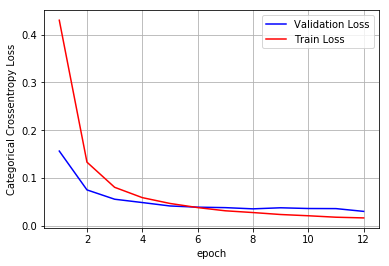

In [14]:
score = model_dr.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

#Training loss
vy = history_dr.history['val_loss']
ty = history_dr.history['loss']
plt_dynamic(x, vy, ty, ax)

In [16]:
#Building a 5 Convolution layer Convnet Model
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout
from keras import backend as K
from keras.initializers import he_normal

model_5_dr=Sequential()
model_5_dr.add(Conv2D(16, kernel_size=(5, 5),
                 activation='relu',
                 kernel_initializer=he_normal(seed=None),padding='same',input_shape=input_shape))
model_5_dr.add(Conv2D(24, kernel_size=(5, 5),activation='relu'))
model_5_dr.add(Conv2D(30, kernel_size=(5, 5),activation='relu'))
model_5_dr.add(MaxPooling2D(pool_size=(2, 2)))

model_5_dr.add(Conv2D(32, kernel_size=(5, 5),activation='relu'))
model_5_dr.add(Conv2D(54, kernel_size=(5, 5),activation='relu'))
model_5_dr.add(MaxPooling2D(pool_size=(2, 2)))

model_5_dr.add(Dropout(0.2))
model_5_dr.add(Flatten())
model_5_dr.add(Dense(128, activation='relu'))
model_5_dr.add(Dense(num_classes, activation='softmax'))

model_5_dr.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 28, 28, 16)        416       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 24, 24, 24)        9624      
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 20, 20, 30)        18030     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 10, 10, 30)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 6, 6, 32)          24032     
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 2, 2, 54)          43254     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 1, 1, 54)          0         
__________

In [17]:
from keras.optimizers import Adagrad
model_5_dr.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
history_5_dr=model_5_dr.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 266s 4ms/step - loss: 0.5271 - acc: 0.8220 - val_loss: 0.1191 - val_acc: 0.9625
Epoch 2/12
60000/60000 [==============================] - 265s 4ms/step - loss: 0.1410 - acc: 0.9570 - val_loss: 0.0838 - val_acc: 0.9733
Epoch 3/12
60000/60000 [==============================] - 266s 4ms/step - loss: 0.0941 - acc: 0.9715 - val_loss: 0.0514 - val_acc: 0.9841
Epoch 4/12
60000/60000 [==============================] - 265s 4ms/step - loss: 0.0718 - acc: 0.9785 - val_loss: 0.0509 - val_acc: 0.9852
Epoch 5/12
60000/60000 [==============================] - 264s 4ms/step - loss: 0.0612 - acc: 0.9823 - val_loss: 0.0491 - val_acc: 0.9849
Epoch 6/12
60000/60000 [==============================] - 266s 4ms/step - loss: 0.0527 - acc: 0.9845 - val_loss: 0.0386 - val_acc: 0.9886
Epoch 7/12
60000/60000 [==============================] - 266s 4ms/step - loss: 0.0469 - acc: 0.9860 - val_loss: 0.0374 - 

Test score: 0.029510731686325745
Test accuracy: 0.9918


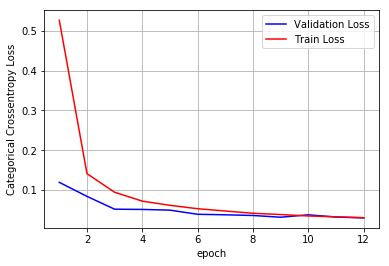

In [18]:
score = model_5_dr.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

#Training loss
vy = history_5_dr.history['val_loss']
ty = history_5_dr.history['loss']
plt_dynamic(x, vy, ty, ax)

In [19]:
#Building a 7 Convolution layer Convnet Model
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout
from keras.layers import Convolution2D
from keras import backend as K
from keras.initializers import he_normal

model_7_dr=Sequential()
model_7_dr.add(Convolution2D(16, kernel_size=(2, 2),
                 activation='relu',
                 kernel_initializer=he_normal(seed=None),padding='same',input_shape=input_shape))
model_7_dr.add(Convolution2D(22, kernel_size=(2, 2),activation='relu'))
model_7_dr.add(Convolution2D(28, kernel_size=(2, 2),activation='relu'))
model_7_dr.add(MaxPooling2D(pool_size=(2, 2)))

model_7_dr.add(Convolution2D(32, kernel_size=(2, 2),padding='same',activation='relu'))
model_7_dr.add(Convolution2D(40, kernel_size=(2, 2),activation='relu'))
model_7_dr.add(Convolution2D(50, kernel_size=(2, 2),activation='relu'))
model_7_dr.add(Convolution2D(64, kernel_size=(2, 2),activation='relu'))
model_7_dr.add(MaxPooling2D(pool_size=(2, 2)))

model_7_dr.add(Dropout(0.2))
model_7_dr.add(Flatten())
model_7_dr.add(Dense(128, activation='relu'))
model_7_dr.add(Dense(num_classes, activation='softmax'))

model_7_dr.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 28, 28, 16)        80        
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 27, 27, 22)        1430      
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 26, 26, 28)        2492      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 13, 13, 28)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 13, 13, 32)        3616      
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 12, 12, 40)        5160      
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 11, 11, 50)        8050      
__________

In [20]:
from keras.optimizers import Adagrad
model_7_dr.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
history_7_dr=model_7_dr.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 166s 3ms/step - loss: 0.5381 - acc: 0.8189 - val_loss: 0.0917 - val_acc: 0.9715
Epoch 2/12
60000/60000 [==============================] - 164s 3ms/step - loss: 0.1064 - acc: 0.9674 - val_loss: 0.0627 - val_acc: 0.9802
Epoch 3/12
60000/60000 [==============================] - 165s 3ms/step - loss: 0.0759 - acc: 0.9768 - val_loss: 0.0513 - val_acc: 0.9828
Epoch 4/12
60000/60000 [==============================] - 164s 3ms/step - loss: 0.0591 - acc: 0.9816 - val_loss: 0.0418 - val_acc: 0.9865
Epoch 5/12
60000/60000 [==============================] - 164s 3ms/step - loss: 0.0463 - acc: 0.9852 - val_loss: 0.0417 - val_acc: 0.9872
Epoch 6/12
60000/60000 [==============================] - 165s 3ms/step - loss: 0.0397 - acc: 0.9875 - val_loss: 0.0337 - val_acc: 0.9884
Epoch 7/12
60000/60000 [==============================] - 165s 3ms/step - loss: 0.0344 - acc: 0.9888 - val_loss: 0.0293 - 

Test score: 0.031752553663305844
Test accuracy: 0.9905


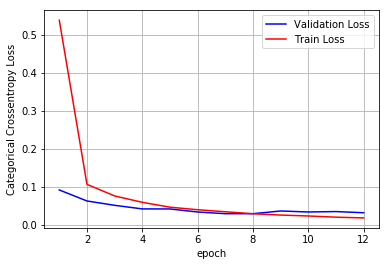

In [21]:
score = model_7_dr.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))
#Training loss
vy = history_7_dr.history['val_loss']
ty = history_7_dr.history['loss']
plt_dynamic(x, vy, ty, ax)

In [5]:
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names =["Model","Test Loss","Dropout Rate","Test Accuracy"]
x.add_row(["CNN(with 3 Convolution Layers)",0.022,0.5,99.32])
x.add_row(["CNN(with 5 Convolution Layers)",0.024,0.5,99.34])
x.add_row(["CNN(with 7 Convolution Layers)",0.0207,0.5,99.39])
x.add_row(["CNN(with 3 Convolution Layers)",0.030,0.2,99.06])
x.add_row(["CNN(with 5 Convolution Layers)",0.0295,0.2,99.18])
x.add_row(["CNN(with 7 Convolution Layers)",0.031,0.2,99.05])

print(x)

+--------------------------------+-----------+--------------+---------------+
|             Model              | Test Loss | Dropout Rate | Test Accuracy |
+--------------------------------+-----------+--------------+---------------+
| CNN(with 3 Convolution Layers) |   0.022   |     0.5      |     99.32     |
| CNN(with 5 Convolution Layers) |   0.024   |     0.5      |     99.34     |
| CNN(with 7 Convolution Layers) |   0.0207  |     0.5      |     99.39     |
| CNN(with 3 Convolution Layers) |    0.03   |     0.2      |     99.06     |
| CNN(with 5 Convolution Layers) |   0.0295  |     0.2      |     99.18     |
| CNN(with 7 Convolution Layers) |   0.031   |     0.2      |     99.05     |
+--------------------------------+-----------+--------------+---------------+
